##### IMPORTS

In [19]:
import re
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [20]:
from tensorflow import keras as tfk
from tensorflow.keras import layers

print(tf.__version__)
print(tfk.models.load_model)

2.13.0
<function load_model at 0x000002972D0448B0>


##### LOAD MODEL

In [21]:
model = keras.models.load_model('../data_preparation/model_output/xray_model.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 separable_conv2d (Separabl  (None, 90, 90, 32)        688       
 eConv2D)                                                    

##### SHAPLEY

In [22]:
import shap

print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.48.0


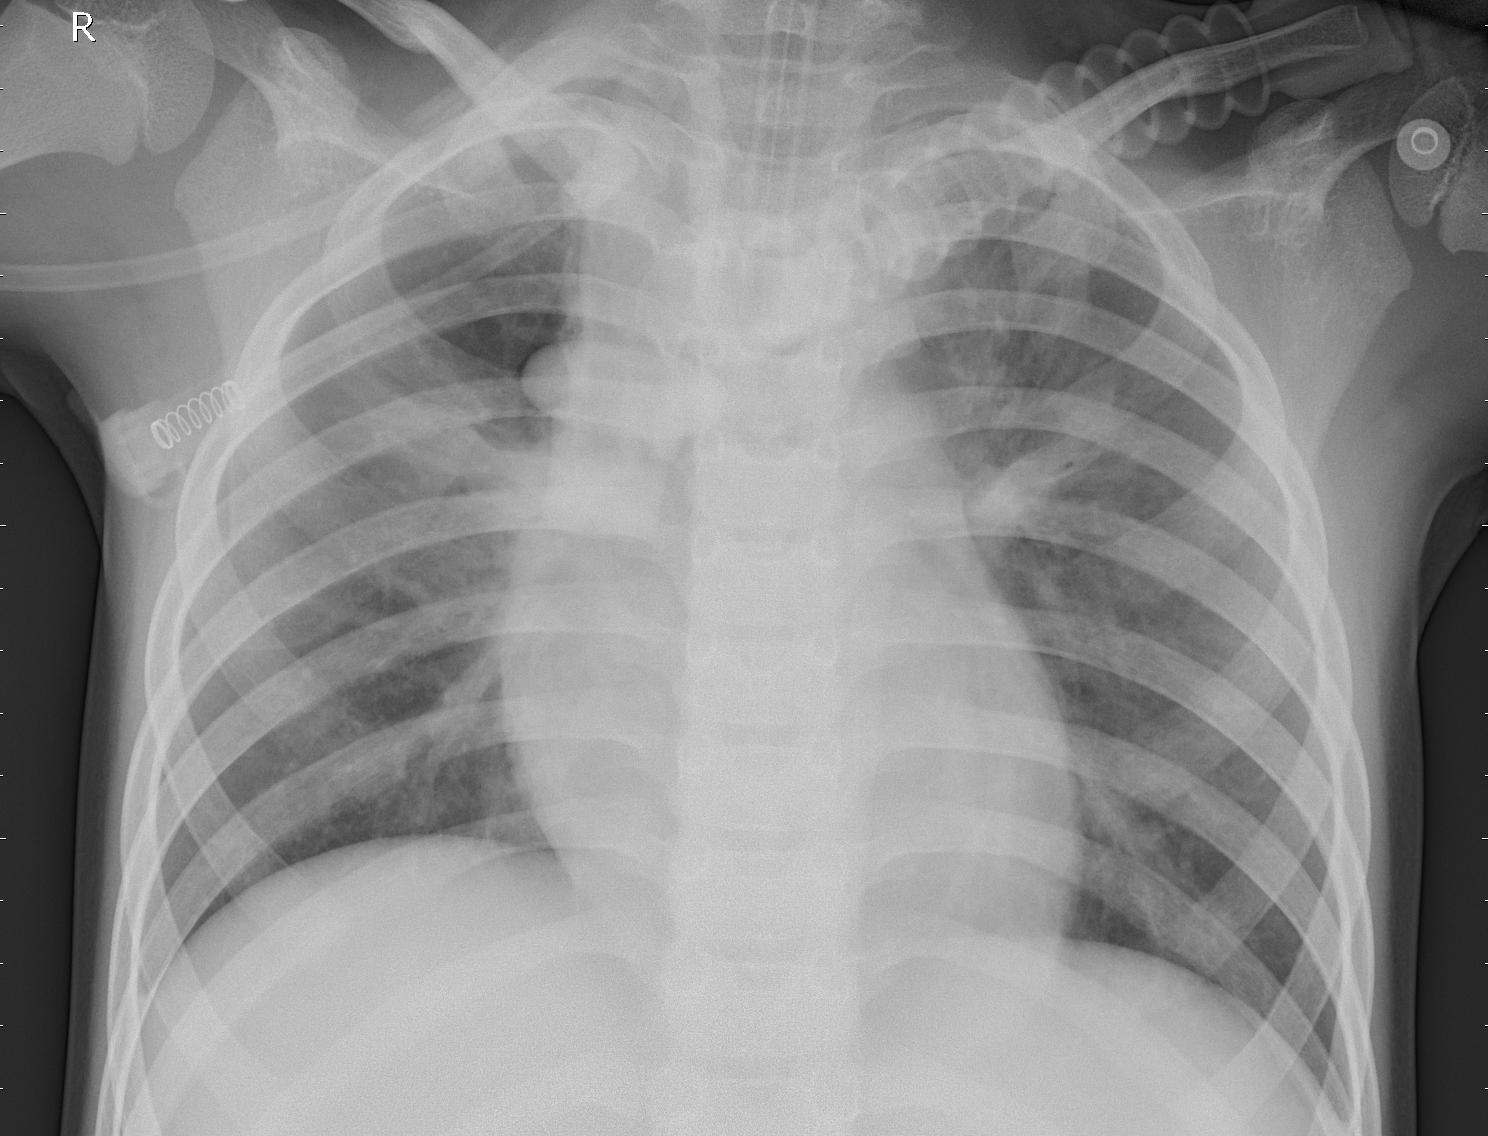

In [23]:
# Local path to one target image
img_path = "../data/data_sample/chest_xray/PNEUMONIA/person10_virus_35.jpeg"

display(Image(img_path))

In [24]:
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)
img.resize(180,180,3)

In [25]:
masker = shap.maskers.Image("inpaint_telea", (180,180,3))
explainer = shap.Explainer(model, masker)

##### LEGENDA:
##### Red parts -> positive contribute
##### Blue parts -> negative contribute

PartitionExplainer explainer: 2it [00:23, 23.19s/it]               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


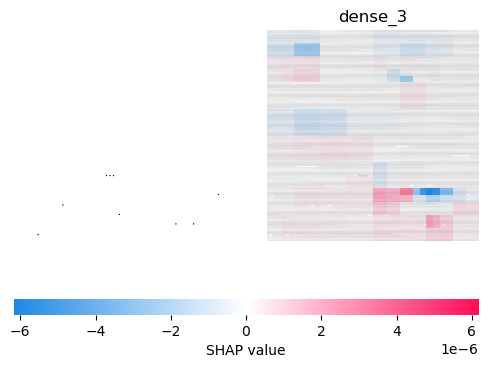

In [26]:
# Here we use 500 evaluations of the underlying model to estimate the SHAP values

shap_values = explainer(np.expand_dims(img, axis=0), max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])
shap.image_plot(shap_values)